In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 18 11:03:25 2021

# *__KNN ALgorithm__   

* __Importing the libararies__

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn import neighbors
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing


* __reading the data and Overview__

In [3]:
wheat=pd.read_csv('F:\DATA SCIENCE\python\py\ALGORITHMS\Knn algo\wheat.csv')
wheat.describe()
wheat


,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
wheat.describe()


,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

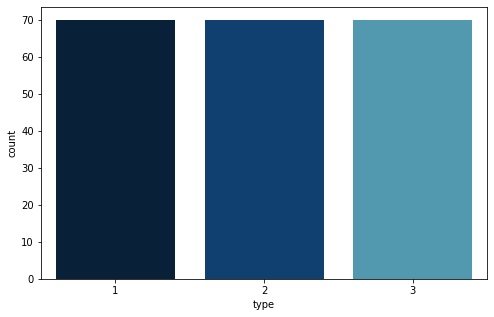

In [22]:
plt.figure(figsize=(8,5))
sns.countplot('type',data=wheat,palette='ocean')

 __Type 1 , 2 , 3 are as of same count.__

* __Regions RG268,RG283,RG254,RG280,RG284 are top 5 Regions had Most Customers off Happy bank.__
* __Regions RG 265,RG267,RG262,RG278,RG255,271 had Least customers of Happy Banks.__

* __for the Bank Most customers are Not active at the time of study__

In [29]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


<AxesSubplot:xlabel='type', ylabel='area'>

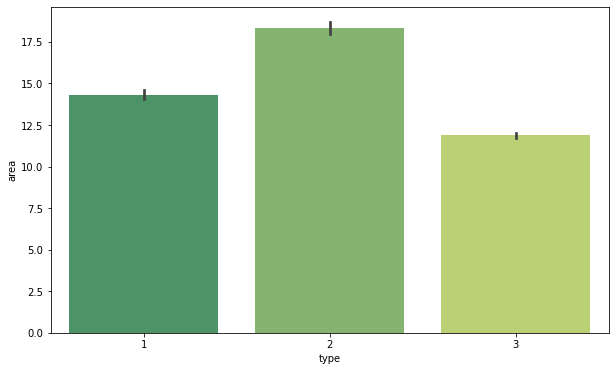

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(y='area',x='type',data=wheat,palette='summer')

* __Either bank had least custmoers as enterprenuer but AVG account balance of enterprenuer is highest,so bank can concentrated on enterprenuer as their Credit card Leads.__

<AxesSubplot:xlabel='type', ylabel='asym_coeff'>

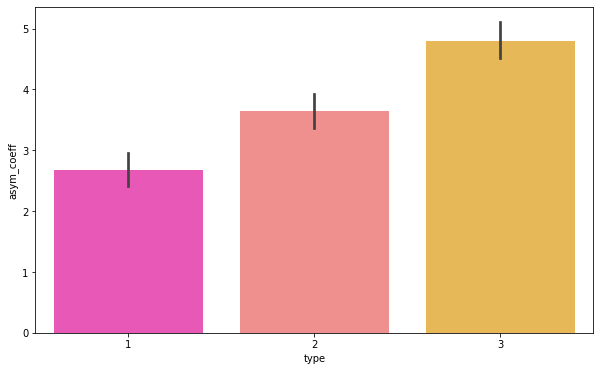

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(y='asym_coeff',x='type',data=wheat,palette='spring')

In [5]:
wheat.shape
wheat.columns

Index(['area', 'perimeter', 'compactness', 'kernel_len', 'kernel_width',
       'asym_coeff', 'kernel_groove', 'type'],
      dtype='object')

* __Checking for null__

In [7]:
wheat.type.value_counts()
#so here all classes are equally distributed so hve to resample it

3    70
2    70
1    70
Name: type, dtype: int64

In [8]:
wheat_std=wheat.copy()
#minmax is stadnerdization for this data

In [9]:
minmax=preprocessing.MinMaxScaler()

*__Sttanderdization to be done only on features__

Replacing y with original y

In [10]:
wheat_std.type=wheat.type

*__Shuffling the dataset because itsin order

In [11]:
wheat_std=wheat_std.sample(frac=1)
wheat_std.shape
wheat_std.tail(20)

,area,perimeter,compactness,kernel_len,kernel_width,asym_coeff,kernel_groove,type
91,18.76,16.20,0.8984,6.172,3.796,3.120,6.053,2
121,18.14,16.12,0.8772,6.059,3.563,3.619,6.011,2
169,11.24,13.00,0.8359,5.090,2.715,3.521,5.088,3
173,11.40,13.08,0.8375,5.136,2.763,5.588,5.089,3
118,18.89,16.23,0.9008,6.227,3.769,3.639,5.966,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
101,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2
25,16.19,15.16,0.8849,5.833,3.421,0.903,5.307,1
26,13.02,13.76,0.8641,5.395,3.026,3.373,4.825,1
202,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3


*__Traintest splitting off data__

In [12]:
trainx,testx,trainy,testy=train_test_split(wheat_std.drop('type',axis=1),
                                           wheat_std.type,
                                           test_size=0.25)
print('trainx={},trainy={},testx={},testy={}'.format(trainx.shape,
                                                      trainy.shape,
                                                      testx.shape,
                                                      testy.shape))
#cross validation for finding out the best k valeue
nn=range(3,11,2)
cv_score=[]

trainx=(157, 7),trainy=(157,),testx=(53, 7),testy=(53,)


* __Model Building__

In [13]:
for  k in nn:
    model=neighbors.KNeighborsClassifier(n_neighbors=k)
    acc=cross_val_score(model,trainx,trainy,cv=5,scoring='accuracy')
    acc=np.round(np.mean(acc),3)
    cv_score.append(acc)
    
print(cv_score)
best_k=nn[cv_score.index(max(cv_score))]
print("best_k is =",best_k)
#so its 9

[0.872, 0.885, 0.898, 0.892]
best_k is = 7


* __Plot the ELBOW chart to determine the best k__ 

Text(0.5, 1.0, 'Acccuracy according to k value')

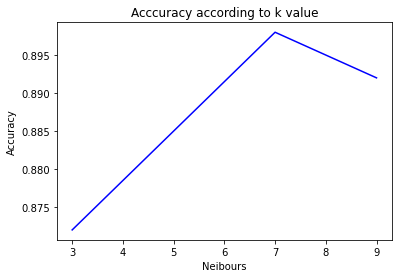

In [14]:
plt.plot(nn,cv_score,color='blue')
plt.xlabel('Neibours')
plt.ylabel('Accuracy')
plt.title("Acccuracy according to k value")

*__model and predictions using the best k__

In [15]:
m1=neighbors.KNeighborsClassifier(n_neighbors=best_k,
                                  metric='manhattan').fit(trainx,trainy)
p1=m1.predict(testx)

In [16]:
#acccuracy score
accuracy_score(testy,p1)

0.9056603773584906

In [17]:
#confusion matrix
cm=pd.DataFrame({'actual':testy,'predicted':p1})
pd.crosstab(cm.actual, cm.predicted,margins=True)

predicted,1,2,3,All
actual,,,,
1,13,2,0,15
2,2,13,0,15
3,1,0,22,23
All,16,15,22,53


In [18]:
print(classification_report(testy, p1))

              precision    recall  f1-score   support

           1       0.81      0.87      0.84        15
           2       0.87      0.87      0.87        15
           3       1.00      0.96      0.98        23

    accuracy                           0.91        53
   macro avg       0.89      0.90      0.89        53
weighted avg       0.91      0.91      0.91        53



* __End of Code__